# Notebook for NSREC publication plots
A collections of analyses and plots for our NSREC paper. As multiple data sets are imported, I am adding caching of parsed data in for of pickle files to save some time. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from src.data_interface import DataInterface
from src.analysis.base_tools import BaseTools
from src.analysis.ibex_coremark_tools import IbexCoremarkTools
from src.analysis.ibex_hwsec_coremark_tools import IbexHwsecCoremarkTools
from src.run_info.run_info import RunInfo
from typing import List, Tuple, NamedTuple
from src.analysis.structures.seu_log import SeuLog
from src.analysis.structures.node import Node

import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.special import comb
from anytree.exporter import DotExporter

def visualization_setup():
    # Interactive plots. Requires tkinter on the machine running the code
    mpl.use("TkAgg")
    # Latex formatting for plots. Some visualizations might not work without this
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["mathtext.fontset"] = "dejavuserif"

## Parse data sets
* Only run this if data has changed. Takes a loooong time
* If re-parsing within a notebook, its recommended to restart the kernel

In [2]:
""" 
Declare which data sets you want to parse in a dict, so they can be looped thru.
 
The key is the name of the data set, the value is a list with the run_info file and 
a boolean indicating if the raw data is to be parsed and cached. 
"""

data_set_info = {
    "baseline"          : ["src/run_info/ibex_coremark.ini", 1],  
    "RV32MSingleCycle"  : ["src/run_info/ibex_RV32MSingleCycle_coremark.ini", 1]
}

In [3]:
class SeuDataSet(NamedTuple):
    runinfo: RunInfo
    root: Node
    node: Tuple[Node]
    root_data: SeuLog
    node_data: SeuLog
    golden: pd.Series
    data_interface: DataInterface

for data_set, runinfo_path in data_set_info.items():
    if runinfo_path[1]: 
        runinfo = RunInfo(runinfo_path[0])
        data_interface = DataInterface(runinfo)
        golden = data_interface.golden_log
        node = data_interface.get_node_by_name("register_file_i")[0]
        root = data_interface.root
        node_data = data_interface.get_seu_log_by_node(node)
        root_data = data_interface.get_seu_log_by_node(root)
        node_runs = list(node_data.index)

        save = SeuDataSet(runinfo, root, node, root_data, node_data, golden, data_interface)
        
        try:
            pickle.dump(save, open(f"cache/{data_set}.pickle", "wb"))
            print(f"Saved {data_set}.pickle to cache.")
        except Exception as e:
            print(e)
            print(f"Could not save {data_set}.pickle to cache.")


Parsing SEU logs...


  0%|          | 0/41997 [00:00<?, ?it/s]

  1%|          | 444/41997 [00:00<00:33, 1255.42it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_07-20-06.040592/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6016: invalid start byte


  5%|▍         | 2054/41997 [00:01<00:32, 1233.24it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_22-31-23.875365/log.txt
  'utf-8' codec can't decode byte 0x9f in position 5948: invalid start byte


  6%|▌         | 2389/41997 [00:01<00:27, 1438.89it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_04-32-55.027259/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_10-39-48.333565/log.txt
  'utf-8' codec can't decode byte 0xfb in position 6325: invalid start byte


  7%|▋         | 2884/41997 [00:02<00:25, 1509.05it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_15-23-10.335708/log.txt
  'utf-8' codec can't decode byte 0xb7 in position 6348: invalid start byte


  9%|▊         | 3632/41997 [00:02<00:27, 1407.60it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_10-27-25.716368/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6295: invalid continuation byte


 11%|█         | 4416/41997 [00:03<00:26, 1432.27it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_03-29-55.992776/log.txt
  'utf-8' codec can't decode byte 0x80 in position 5803: invalid start byte


 12%|█▏        | 4885/41997 [00:03<00:26, 1401.22it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_08-37-35.030100/log.txt
  'utf-8' codec can't decode byte 0xf6 in position 5917: invalid start byte


 13%|█▎        | 5441/41997 [00:04<00:35, 1023.63it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_04-32-42.853588/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6015: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_02-43-01.734575/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte


 14%|█▎        | 5696/41997 [00:04<00:32, 1103.53it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_12-23-23.389707/log.txt
  'utf-8' codec can't decode byte 0x81 in position 6033: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_00-19-32.880741/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6295: invalid continuation byte


 14%|█▍        | 5822/41997 [00:04<00:33, 1085.45it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_04-25-39.122374/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6632: invalid start byte


 17%|█▋        | 7079/41997 [00:05<00:40, 871.54it/s] 

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_01-52-12.571811/log.txt
  'utf-8' codec can't decode byte 0xc8 in position 6039: invalid continuation byte


 19%|█▊        | 7839/41997 [00:06<00:24, 1368.21it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_08-12-35.794251/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-12_02-50-30.437456/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte


 19%|█▉        | 8169/41997 [00:06<00:22, 1498.52it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_18-44-50.101877/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6268: invalid continuation byte


 20%|█▉        | 8323/41997 [00:06<00:26, 1275.68it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_17-28-54.246438/log.txt
  'utf-8' codec can't decode byte 0xf6 in position 6260: invalid start byte


 24%|██▍       | 10287/41997 [00:08<00:23, 1321.59it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_15-08-51.374973/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6120: invalid continuation byte


 31%|███       | 12845/41997 [00:10<00:20, 1410.00it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_15-23-49.147500/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte


 32%|███▏      | 13420/41997 [00:10<00:21, 1330.50it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_03-40-02.589573/log.txt
  'utf-8' codec can't decode byte 0xf9 in position 6348: invalid start byte


 36%|███▌      | 14932/41997 [00:12<00:22, 1181.25it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_15-07-53.396920/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_00-14-15.554540/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6619: invalid start byte


 37%|███▋      | 15593/41997 [00:12<00:26, 1007.41it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_03-46-07.578247/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6295: invalid continuation byte


 38%|███▊      | 15947/41997 [00:13<00:35, 740.95it/s] 

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_10-36-41.648379/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6066: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_18-41-23.598658/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte


 41%|████      | 17113/41997 [00:14<00:18, 1338.74it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_01-32-59.598415/log.txt
  'utf-8' codec can't decode byte 0x8a in position 5922: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_13-48-24.148049/log.txt
  'utf-8' codec can't decode byte 0x81 in position 6280: invalid start byte


 45%|████▌     | 18975/41997 [00:15<00:18, 1249.32it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_18-28-07.396972/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6016: invalid start byte


 48%|████▊     | 20161/41997 [00:16<00:19, 1127.62it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_03-39-22.188417/log.txt
  'utf-8' codec can't decode byte 0xaf in position 5972: invalid start byte


 49%|████▉     | 20742/41997 [00:17<00:15, 1366.80it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_09-15-35.779437/log.txt
  'utf-8' codec can't decode byte 0xbb in position 6139: invalid start byte


 52%|█████▏    | 22004/41997 [00:18<00:12, 1571.96it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_12-57-45.949345/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6295: invalid continuation byte


 54%|█████▎    | 22500/41997 [00:18<00:13, 1419.22it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_18-02-09.885750/log.txt
  'utf-8' codec can't decode byte 0xb7 in position 6388: invalid start byte


 55%|█████▍    | 22979/41997 [00:18<00:13, 1422.11it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_09-33-54.621017/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte


 56%|█████▌    | 23593/41997 [00:19<00:12, 1502.65it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_17-08-10.739725/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_22-20-13.145288/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte


 57%|█████▋    | 24027/41997 [00:19<00:13, 1351.08it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_09-38-46.410406/log.txt
  'utf-8' codec can't decode byte 0xb3 in position 5892: invalid start byte


 62%|██████▏   | 26065/41997 [00:21<00:10, 1553.82it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_14-14-21.533350/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6295: invalid continuation byte


 64%|██████▎   | 26727/41997 [00:21<00:09, 1639.14it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_21-56-58.481187/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6016: invalid start byte


 65%|██████▌   | 27385/41997 [00:22<00:09, 1524.05it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_15-44-01.922086/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6528: invalid continuation byte


 66%|██████▋   | 27889/41997 [00:22<00:09, 1496.56it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_23-07-49.796070/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_22-08-14.356004/log.txt
  'utf-8' codec can't decode byte 0xcc in position 5926: invalid continuation byte


 68%|██████▊   | 28394/41997 [00:22<00:08, 1603.08it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_23-49-28.848455/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 5804: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-09_12-22-33.205239/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6631: invalid start byte


 80%|███████▉  | 33421/41997 [00:26<00:06, 1389.25it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_01-14-58.484052/log.txt
  'utf-8' codec can't decode byte 0xfc in position 5976: invalid start byte


 84%|████████▎ | 35103/41997 [00:27<00:05, 1216.01it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_02-21-32.634056/log.txt
  'utf-8' codec can't decode byte 0xcc in position 5927: invalid continuation byte


 84%|████████▍ | 35434/41997 [00:27<00:04, 1421.56it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_19-17-10.856665/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte


 88%|████████▊ | 36842/41997 [00:29<00:03, 1380.36it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_16-00-59.850415/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6020: invalid continuation byte


 91%|█████████ | 38270/41997 [00:30<00:02, 1291.55it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_21-24-01.351898/log.txt
  'utf-8' codec can't decode byte 0x93 in position 5922: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-12_00-56-20.971159/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6295: invalid continuation byte


 94%|█████████▍| 39489/41997 [00:31<00:01, 1302.45it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_06-29-45.537581/log.txt
  'utf-8' codec can't decode byte 0xd8 in position 5803: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_12-10-12.370406/log.txt
  'utf-8' codec can't decode byte 0xa5 in position 6093: invalid start byte


 97%|█████████▋| 40551/41997 [00:32<00:01, 1302.94it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_17-59-27.635150/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6016: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_00-27-58.845891/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-10_20-29-16.757909/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6017: invalid start byte


 99%|█████████▊| 41378/41997 [00:32<00:00, 1572.37it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_baseline_41k_120124/seu_2024-01-11_04-50-48.191541/log.txt
  'utf-8' codec can't decode byte 0x98 in position 6029: invalid start byte


100%|██████████| 41997/41997 [00:33<00:00, 1270.77it/s]


  Parsed 40455 logs, percent failed reads: 0.14%
Done parsing SEU logs
Building register tree
  68.94% of the register tree is unpopulated
Built register tree
Saved baseline.pickle to cache.
Parsing SEU logs...


  0%|          | 107/98243 [00:00<01:31, 1067.08it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_03-19-15.335438/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6012: invalid continuation byte


  0%|          | 379/98243 [00:00<01:17, 1266.98it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_08-06-48.143199/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6182: invalid continuation byte


  1%|          | 995/98243 [00:00<01:10, 1388.67it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_02-36-44.048116/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


  2%|▏         | 2440/98243 [00:01<01:10, 1365.80it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_03-51-55.888917/log.txt
  'utf-8' codec can't decode byte 0xcb in position 6031: invalid continuation byte


  3%|▎         | 3101/98243 [00:02<01:02, 1534.09it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_14-43-32.410247/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_15-30-21.168260/log.txt
  'utf-8' codec can't decode byte 0x85 in position 5888: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_19-06-30.695383/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6328: invalid continuation byte


  4%|▍         | 3849/98243 [00:02<01:19, 1193.36it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_11-34-13.302733/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


  6%|▌         | 5784/98243 [00:04<01:11, 1293.81it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_08-08-09.589132/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


  7%|▋         | 6844/98243 [00:05<01:18, 1171.08it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_08-31-01.909231/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 10%|▉         | 9364/98243 [00:07<01:03, 1397.11it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_18-18-54.926519/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6276: invalid continuation byte


 11%|█         | 10944/98243 [00:08<01:04, 1344.83it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_01-54-46.530763/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6181: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_15-07-30.048714/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6250: invalid continuation byte


 13%|█▎        | 12502/98243 [00:09<01:06, 1288.14it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_17-47-00.095400/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6058: invalid start byte


 14%|█▍        | 13707/98243 [00:10<01:07, 1250.91it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_07-02-09.694325/log.txt
  'utf-8' codec can't decode byte 0xe7 in position 6367: invalid continuation byte


 14%|█▍        | 13848/98243 [00:10<01:05, 1293.49it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_01-04-48.617371/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 15%|█▍        | 14424/98243 [00:11<01:03, 1315.06it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_15-36-59.596549/log.txt
  'utf-8' codec can't decode byte 0xa8 in position 5890: invalid start byte


 16%|█▌        | 15275/98243 [00:11<01:13, 1131.87it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_01-55-36.298404/log.txt
  'utf-8' codec can't decode byte 0xc1 in position 6051: invalid start byte


 16%|█▋        | 16144/98243 [00:12<01:14, 1107.97it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_00-59-37.245370/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 17%|█▋        | 16788/98243 [00:13<00:55, 1455.60it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_08-55-17.347104/log.txt
  'utf-8' codec can't decode byte 0xff in position 6219: invalid start byte


 19%|█▊        | 18182/98243 [00:14<00:51, 1550.92it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_00-37-01.584310/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6132: invalid continuation byte


 20%|█▉        | 19604/98243 [00:15<00:59, 1327.76it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_03-19-27.109106/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6705: invalid start byte


 21%|██        | 20181/98243 [00:15<01:06, 1165.37it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_12-05-50.415294/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 21%|██        | 20824/98243 [00:16<00:51, 1510.20it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_09-38-58.574537/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6230: invalid start byte


 23%|██▎       | 22922/98243 [00:17<00:45, 1643.90it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_02-20-39.072949/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6327: invalid continuation byte


 24%|██▍       | 23423/98243 [00:17<00:45, 1643.23it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_19-49-36.872923/log.txt
  'utf-8' codec can't decode byte 0xd0 in position 6177: invalid continuation byte


 25%|██▌       | 24781/98243 [00:19<01:03, 1150.99it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_17-18-11.289401/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6009: invalid start byte


 26%|██▌       | 25547/98243 [00:19<00:59, 1231.63it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_03-33-11.749171/log.txt
  'utf-8' codec can't decode byte 0xe2 in position 6466: invalid continuation byte


 26%|██▋       | 25888/98243 [00:19<00:50, 1445.56it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-28_23-51-42.260585/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6570: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_04-48-08.865881/log.txt
  'utf-8' codec can't decode byte 0x80 in position 6436: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_01-14-27.114834/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6100: invalid start byte


 28%|██▊       | 27676/98243 [00:21<00:50, 1408.46it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_15-57-23.375304/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6057: invalid start byte


 29%|██▊       | 28164/98243 [00:21<00:46, 1501.56it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_06-33-33.823919/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-28_23-51-49.812334/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6640: invalid continuation byte


 30%|███       | 29502/98243 [00:22<01:07, 1013.33it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_12-51-27.180023/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6100: invalid start byte


 32%|███▏      | 31039/98243 [00:23<00:52, 1270.22it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_20-47-11.570976/log.txt
  'utf-8' codec can't decode byte 0x81 in position 6769: invalid start byte


 33%|███▎      | 32857/98243 [00:25<01:13, 884.91it/s] 

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_08-07-59.530894/log.txt
  'utf-8' codec can't decode byte 0x93 in position 6056: invalid start byte


 34%|███▍      | 33466/98243 [00:25<00:59, 1090.59it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_16-54-52.537500/log.txt
  'utf-8' codec can't decode byte 0xd0 in position 6436: invalid continuation byte


 34%|███▍      | 33735/98243 [00:26<01:04, 1006.54it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_14-38-16.697962/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6380: invalid continuation byte


 36%|███▌      | 35246/98243 [00:27<00:44, 1403.80it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_07-03-27.331466/log.txt
  'utf-8' codec can't decode byte 0xa0 in position 5945: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_21-56-30.414078/log.txt
  'utf-8' codec can't decode byte 0x92 in position 6033: invalid start byte


 36%|███▋      | 35720/98243 [00:27<00:41, 1511.62it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_03-10-43.784866/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6055: invalid start byte


 37%|███▋      | 36339/98243 [00:27<00:40, 1528.82it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_01-03-31.885889/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 5889: invalid start byte


 37%|███▋      | 36840/98243 [00:28<00:39, 1546.77it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_18-14-07.778458/log.txt
  'utf-8' codec can't decode byte 0x81 in position 6765: invalid start byte


 39%|███▊      | 37835/98243 [00:28<00:37, 1625.60it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_23-15-51.123420/log.txt
  'utf-8' codec can't decode byte 0xfc in position 6550: invalid start byte


 39%|███▉      | 38162/98243 [00:29<00:37, 1601.59it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_00-05-09.522099/log.txt
  'utf-8' codec can't decode byte 0xff in position 6311: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_19-22-48.209727/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 39%|███▉      | 38805/98243 [00:29<00:42, 1403.18it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_03-16-02.150609/log.txt
  'utf-8' codec can't decode byte 0xb7 in position 6205: invalid start byte


 40%|████      | 39744/98243 [00:30<00:42, 1374.74it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_07-52-20.495288/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_14-49-03.755382/log.txt
  'utf-8' codec can't decode byte 0xf2 in position 6337: invalid continuation byte


 41%|████      | 40248/98243 [00:30<00:37, 1551.94it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_10-37-18.809658/log.txt
  'utf-8' codec can't decode byte 0x82 in position 5973: invalid start byte


 41%|████▏     | 40681/98243 [00:30<00:45, 1267.72it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_02-04-28.962234/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6275: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_05-57-48.170331/log.txt
  'utf-8' codec can't decode byte 0xd0 in position 6731: invalid continuation byte


 42%|████▏     | 41158/98243 [00:31<00:44, 1288.20it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_10-14-41.766290/log.txt
  'utf-8' codec can't decode byte 0xf2 in position 6477: invalid continuation byte


 42%|████▏     | 41463/98243 [00:31<00:49, 1157.60it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_17-35-19.135700/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6314: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_05-32-15.832576/log.txt
  'utf-8' codec can't decode byte 0xfa in position 6367: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_06-17-56.918953/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6012: invalid continuation byte


 43%|████▎     | 42568/98243 [00:32<00:38, 1448.60it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_16-21-07.544532/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6161: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_00-22-29.967654/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6379: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_02-57-19.351813/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6250: invalid continuation byte


 45%|████▍     | 44159/98243 [00:33<00:37, 1454.79it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_08-01-43.788624/log.txt
  'utf-8' codec can't decode byte 0xb7 in position 6565: invalid start byte


 46%|████▌     | 44722/98243 [00:34<00:39, 1340.71it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_09-49-45.609646/log.txt
  'utf-8' codec can't decode byte 0xc0 in position 6007: invalid start byte


 47%|████▋     | 45955/98243 [00:35<00:48, 1075.48it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_18-02-51.756018/log.txt
  'utf-8' codec can't decode byte 0x8c in position 6032: invalid start byte


 49%|████▉     | 48233/98243 [00:36<00:41, 1216.60it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_07-08-34.516210/log.txt
  'utf-8' codec can't decode byte 0xe8 in position 6205: invalid continuation byte


 50%|█████     | 49320/98243 [00:37<00:45, 1078.48it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_07-21-09.782956/log.txt
  'utf-8' codec can't decode byte 0x93 in position 6007: invalid start byte


 53%|█████▎    | 52052/98243 [00:39<00:28, 1639.00it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_09-43-20.274953/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6714: invalid start byte


 56%|█████▌    | 54600/98243 [00:41<00:37, 1157.35it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_14-55-49.397118/log.txt
  'utf-8' codec can't decode byte 0xe8 in position 6206: invalid continuation byte


 57%|█████▋    | 56039/98243 [00:42<00:26, 1583.06it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_14-22-16.616353/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6100: invalid start byte


 58%|█████▊    | 56628/98243 [00:43<00:35, 1165.15it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_11-05-20.904326/log.txt
  'utf-8' codec can't decode byte 0x8b in position 6479: invalid start byte


 58%|█████▊    | 56943/98243 [00:43<00:31, 1299.62it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_07-11-05.282354/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 58%|█████▊    | 57262/98243 [00:43<00:32, 1253.11it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_11-10-09.987545/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6058: invalid start byte


 60%|██████    | 59004/98243 [00:45<00:33, 1185.10it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_05-32-40.922160/log.txt
  'utf-8' codec can't decode byte 0x80 in position 6653: invalid start byte


 61%|██████▏   | 60357/98243 [00:46<00:26, 1449.36it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_23-47-29.865127/log.txt
  'utf-8' codec can't decode byte 0x91 in position 6355: invalid start byte


 64%|██████▎   | 62521/98243 [00:47<00:22, 1586.73it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_23-09-06.837534/log.txt
  'utf-8' codec can't decode byte 0xd0 in position 6604: invalid continuation byte


 64%|██████▍   | 62822/98243 [00:48<00:28, 1239.69it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_04-00-45.120428/log.txt
  'utf-8' codec can't decode byte 0x86 in position 6358: invalid start byte


 65%|██████▌   | 64264/98243 [00:49<00:21, 1568.52it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_03-28-48.477860/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6100: invalid start byte


 66%|██████▌   | 64875/98243 [00:49<00:24, 1351.14it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_21-27-04.023793/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 67%|██████▋   | 65337/98243 [00:49<00:24, 1346.13it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_11-36-30.005452/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6078: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_10-46-05.367982/log.txt
  'utf-8' codec can't decode byte 0x8e in position 6559: invalid start byte


 68%|██████▊   | 66384/98243 [00:50<00:28, 1099.91it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_20-14-28.033966/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6380: invalid continuation byte


 68%|██████▊   | 66949/98243 [00:51<00:26, 1188.54it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_21-59-47.126167/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6380: invalid continuation byte


 69%|██████▉   | 68259/98243 [00:52<00:25, 1188.06it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_10-48-39.530825/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 70%|███████   | 68821/98243 [00:52<00:24, 1178.26it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_06-23-19.326866/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 71%|███████   | 69691/98243 [00:53<00:23, 1236.19it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_02-24-42.392532/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 72%|███████▏  | 70479/98243 [00:54<00:23, 1193.93it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_22-07-11.285056/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6100: invalid start byte


 72%|███████▏  | 70938/98243 [00:54<00:20, 1305.00it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_16-00-14.025112/log.txt
  'utf-8' codec can't decode byte 0x93 in position 5951: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_00-08-20.210331/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6691: invalid start byte


 74%|███████▎  | 72221/98243 [00:55<00:19, 1360.36it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_23-40-54.849418/log.txt
  'utf-8' codec can't decode byte 0xfc in position 6450: invalid start byte


 75%|███████▍  | 73450/98243 [00:56<00:19, 1241.61it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_22-32-11.407669/log.txt
  'utf-8' codec can't decode byte 0x80 in position 6050: invalid start byte


 76%|███████▌  | 74752/98243 [00:58<00:18, 1241.57it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_02-30-26.524669/log.txt
  'utf-8' codec can't decode byte 0x80 in position 6472: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_07-21-51.262211/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 78%|███████▊  | 76310/98243 [00:59<00:14, 1496.03it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_17-44-03.786463/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


 78%|███████▊  | 77102/98243 [00:59<00:14, 1494.73it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_06-51-40.129470/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 79%|███████▉  | 77885/98243 [01:00<00:15, 1294.74it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_00-54-10.064428/log.txt
  'utf-8' codec can't decode byte 0xc4 in position 6603: invalid continuation byte


 80%|███████▉  | 78183/98243 [01:00<00:14, 1384.00it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_17-25-40.778247/log.txt
  'utf-8' codec can't decode byte 0xe0 in position 6033: invalid continuation byte


 80%|████████  | 78623/98243 [01:00<00:13, 1432.47it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_17-47-51.669054/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6571: invalid continuation byte


 81%|████████  | 79340/98243 [01:01<00:14, 1300.58it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-18_03-30-04.111728/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6161: invalid continuation byte


 81%|████████  | 79781/98243 [01:01<00:14, 1258.28it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_15-24-14.874080/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 82%|████████▏ | 81016/98243 [01:02<00:14, 1209.63it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_23-58-05.943748/log.txt
  'utf-8' codec can't decode byte 0xd6 in position 6199: invalid continuation byte


 83%|████████▎ | 81790/98243 [01:03<00:11, 1492.56it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_03-35-54.079709/log.txt
  'utf-8' codec can't decode byte 0x93 in position 6507: invalid start byte


 85%|████████▍ | 83214/98243 [01:04<00:09, 1511.29it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_14-29-23.259524/log.txt
  'utf-8' codec can't decode byte 0x91 in position 6355: invalid start byte


 86%|████████▌ | 84163/98243 [01:04<00:09, 1439.17it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_19-09-14.912131/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6613: invalid continuation byte


 86%|████████▋ | 84794/98243 [01:05<00:08, 1514.10it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-15_18-24-47.650015/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6700: invalid start byte


 87%|████████▋ | 85739/98243 [01:05<00:07, 1567.73it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-30_00-32-23.938217/log.txt
  'utf-8' codec can't decode byte 0x85 in position 6006: invalid start byte


 89%|████████▊ | 86963/98243 [01:06<00:07, 1488.61it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_20-30-37.037594/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 90%|████████▉ | 88023/98243 [01:07<00:07, 1313.14it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_05-43-40.267103/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6482: invalid continuation byte


 91%|█████████ | 89232/98243 [01:08<00:07, 1262.50it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_01-34-14.793470/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6380: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_05-06-48.042940/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6231: invalid start byte


 91%|█████████▏| 89668/98243 [01:08<00:07, 1198.70it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_19-31-08.700651/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


 92%|█████████▏| 90204/98243 [01:09<00:07, 1111.19it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_15-28-11.349400/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6686: invalid continuation byte


 95%|█████████▍| 93294/98243 [01:12<00:05, 904.60it/s] 

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_22-09-15.774796/log.txt
  'utf-8' codec can't decode byte 0x82 in position 6715: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-17_04-55-24.484701/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6571: invalid continuation byte


 99%|█████████▊| 96937/98243 [01:14<00:00, 1373.53it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_09-16-32.254028/log.txt
  'utf-8' codec can't decode byte 0xc8 in position 6125: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_22-50-20.859533/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6379: invalid continuation byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-31_07-09-38.258987/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6100: invalid start byte
  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-16_08-58-02.524412/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6101: invalid start byte


100%|█████████▉| 98030/98243 [01:15<00:00, 1435.05it/s]

  Could not read /home/anvesh/projects/Ibex-Analysis/data_RV32MSingleCycle_080124/seu_2023-12-29_13-11-09.982644/log.txt
  'utf-8' codec can't decode byte 0x94 in position 6102: invalid start byte


100%|██████████| 98243/98243 [01:15<00:00, 1293.30it/s]


  Parsed 94587 logs, percent failed reads: 0.12%
Done parsing SEU logs
Building register tree
  68.94% of the register tree is unpopulated
Built register tree
Saved RV32MSingleCycle.pickle to cache.


## Load Cached Data

In [4]:
# load data sets from cache
data_sets = {name : pickle.load(open(f"cache/{name}.pickle", "rb")) for name in data_set_info.keys()}
# print(data_sets)

## Analyses

In [5]:

import matplotlib.pyplot as plt

plt.rcParams.update({
    # 'font.family': 'serif',
    # 'font.serif': ['Times', 'Palatino', 'New Century Schoolbook', 'Bookman', 'Computer Modern Roman'],
    'font.size': 8,
    'axes.labelsize': 8,
    'axes.titlesize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.dpi': 300,
    'figure.figsize': [3.39, 2.10],
    'lines.linewidth': 1.0,
    'lines.markersize': 4,
    'lines.markeredgewidth': 0.5,
    'lines.markeredgecolor': 'black',
    'lines.markerfacecolor': 'black'
    # 'text.usetex': True,
    # 'text.latex.preamble': r'\usepackage{amsmath}'
})

# _ = BaseTools.error_classification_confidence(data_interface, data_sets["RV32MSingleCycle"].root, visualize=True)
# _ = BaseTools.error_classification_confidence(data_interface, data_sets["RV32MSingleCycle"].node, visualize=True)

### Grouped bar plots

Data set: baseline
Number of entries on node_data: 13971
Number of entries on root_data: 40455
NE      36123
SDC      3058
SEFI     1274
Name: count, dtype: int64
Totals of baseline: 40455
Data set: RV32MSingleCycle
Number of entries on node_data: 32213
Number of entries on root_data: 94587
NE      84481
SDC      7028
SEFI     3078
Name: count, dtype: int64
Totals of RV32MSingleCycle: 94587


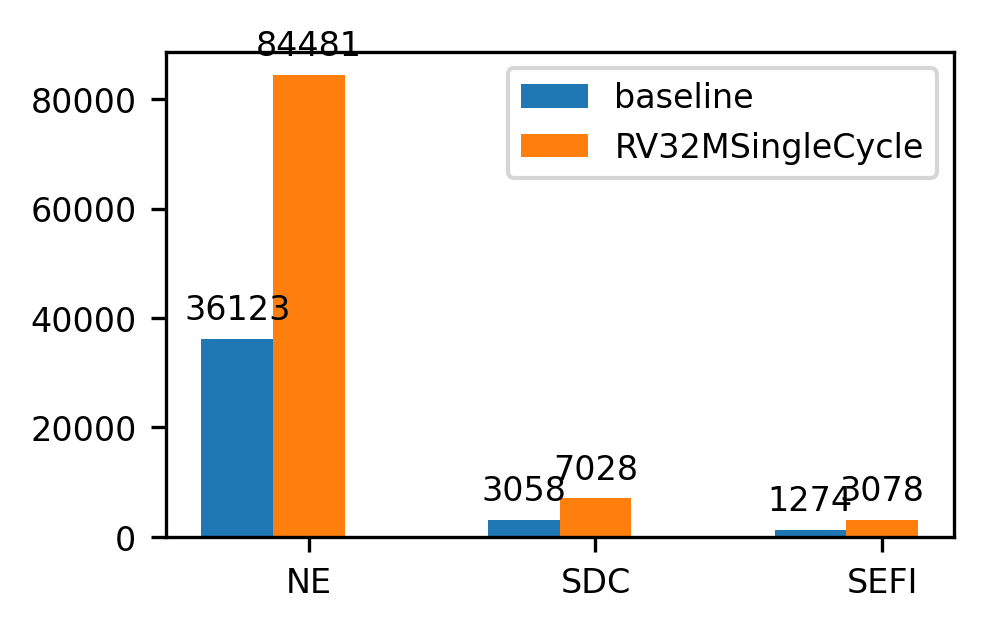

In [6]:
# Define the number of groups and members per group
num_groups = len(data_sets.keys())
members_per_group = 3

from src.analysis.structures.error_definitions import (
    SilentError,
    DataCorruptionError,
    CriticalError,
    BaseError,
)

# Define the x-axis tick locations
x_tick_locs = np.arange(members_per_group)

bar_width = 0.25
multiplier = 0

fig, ax = plt.subplots()

# Multi bar plot grouped by error outcome
for name, data_set in data_sets.items():

    print(f"Data set: {name}")
    print(f"Number of entries on node_data: {len(data_set.node_data)}")
    print(f"Number of entries on root_data: {len(data_set.root_data)}")

    # get error outcomes
    data = BaseTools.error_classification(data_set.data_interface, data_set.root, visualize=False)
    # count unique values
    counts = data.value_counts()
    print(counts)
    print(f"Totals of {name}: {counts.sum()}")

    offset  = bar_width * multiplier
    rects = ax.bar(x_tick_locs + offset, counts, width=bar_width, label=name)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xticks(x_tick_locs + (members_per_group - 1) * bar_width / 2)
ax.set_xticklabels(counts.index)

ax.legend()
plt.show()




Group by config

      baseline  RV32MSingleCycle
NE       36123             84481
SDC       3058              7028
SEFI      1274              3078
      baseline  RV32MSingleCycle
NE    0.892918          0.893157
SDC   0.075590          0.074302
SEFI  0.031492          0.032541
                       SDC      SEFI
baseline          0.075590  0.031492
RV32MSingleCycle  0.071179  0.031174


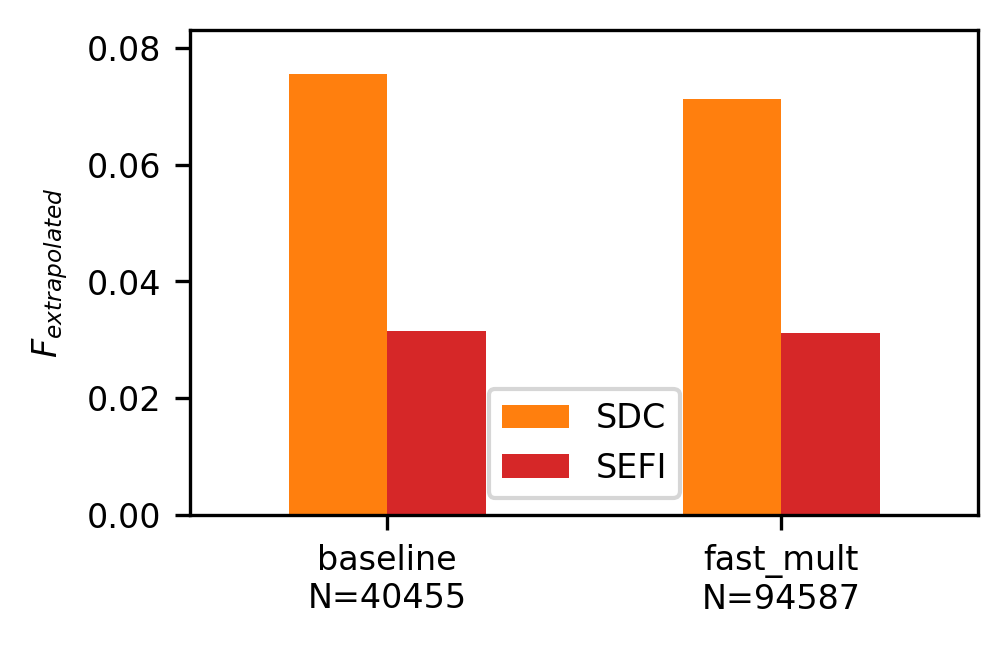

In [81]:
from src.analysis.structures.error_definitions import (
    SilentError,
    DataCorruptionError,
    CriticalError,
    BaseError,
)

x_tick_locs = np.arange(len(data_sets.keys()))

# provide which errors are to be plotted
errors_classes_to_plot = [DataCorruptionError, CriticalError]
transpose = 1

df_raw = pd.DataFrame()

# Multi bar plot grouped by configuration
for name, data_set in data_sets.items():

    # get error outcomes
    data = BaseTools.error_classification(data_set.data_interface, data_set.root, visualize=False)

    # count unique values
    counts = data.value_counts()
    counts = counts.rename(name)

    # build data to plot
    df_raw = pd.concat([df_raw, counts], axis=1, sort=False)

# get proportions of each error class against sum of each row
# i.e. f_samples / n_samples
N_sampled = df_raw.sum(axis=0)
df_prop = df_raw.div(N_sampled, axis=1) # proportional

# population size of each config normalized to baseline
S_pop = np.array([getattr(data_sets[name].runinfo.data, "cpu_cyles") for name in data_sets.keys()]) / getattr(data_sets["baseline"].runinfo.data, "cpu_cyles")

# calc extrapolated f = S * (f_samples / n_samples)
f_extrapolated = df_prop.multiply(S_pop, axis=1)

# plot
error_class_names = [str(error_class.name) for error_class in errors_classes_to_plot]
f_extrapolated = f_extrapolated.loc[error_class_names]

if transpose:
    f_extrapolated = f_extrapolated.transpose()

print(df_raw)
print(df_prop)
print(f_extrapolated)

ax = f_extrapolated.plot.bar(color=[error_class.color for error_class in errors_classes_to_plot])

legend = ax.get_legend_handles_labels()

if transpose: 
    ax.set_xticklabels([f"baseline\nN={N_sampled.iloc[0]}", f"fast_mult\nN={N_sampled.iloc[1]}"], rotation=0)
    ax.set_ylim(0, 1.1 * f_extrapolated.max().max())
    ax.set_ylabel(r"$F_{extrapolated}$")

In [11]:
print(getattr(data_sets["baseline"].runinfo.data, "cpu_cyles"))
# unfound_info = [info for info in data_sets["baseline"].runinfo.data.entries]

478924


/home/anvesh/projects/Ibex-Analysis/src/analysis/ibex_coremark_tools.py:73: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


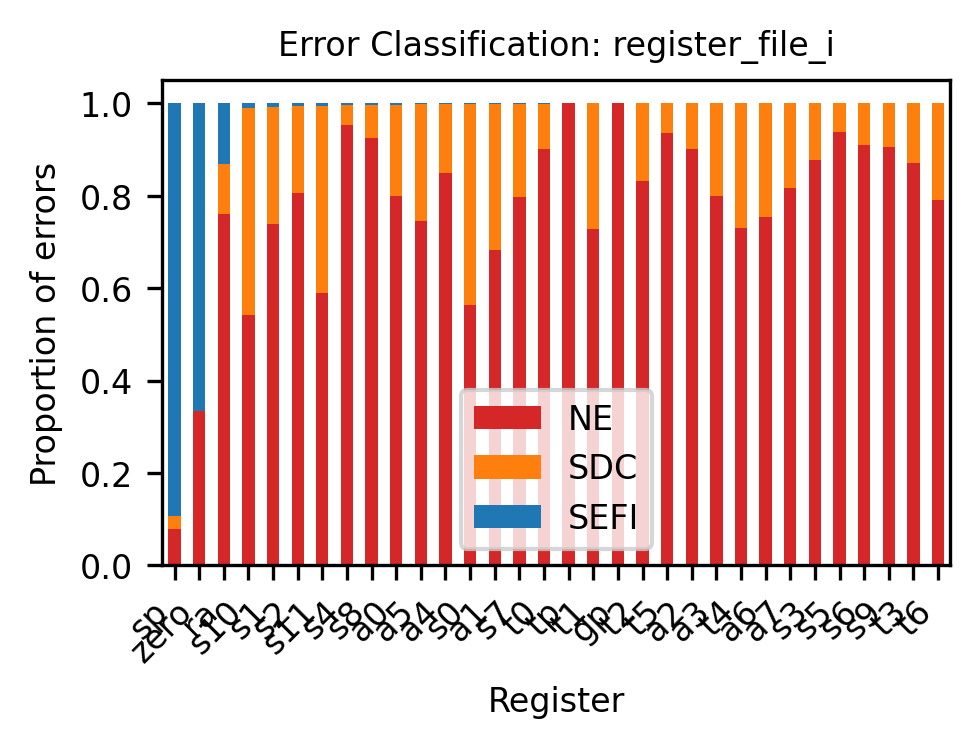

In [ ]:
node = data_interface.get_node_by_name("register_file_i")[0]
node.children
_, fig = IbexCoremarkTools.stacked_register_error_class(
    data_interface, node, visualize=True
)